In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

husavik is
rikitea pf
victoria sc
hervey bay au
cape town za
krasnoselkup ru
avarua ck
busselton au
sept-iles ca
barrow us
illoqqortoormiut gl
pop uz
east london za
jamestown sh
araouane ml
cantavir rs
ushuaia ar
attawapiskat ca
dikson ru
mochicahui mx
harbour breton ca
tibiri ne
nantucket us
leh in
codrington ag
manggar id
rikitea pf
bambous virieux mu
ushuaia ar
kosa ru
coquimbo cl
kavieng pg
georgetown sh
waipawa nz
santa rosalia mx
arraial do cabo br
mataura pf
roald no
guerrero negro mx
malwan in
komsomolskiy ru
port alfred za
saint-louis re
bluff nz
galveston us
hilo us
barentsburg sj
toamasina mg
hithadhoo mv
bluff nz
sisophon kh
busselton au
port elizabeth za
amderma ru
quartucciu it
narsaq gl
arraial do cabo br
ushuaia ar
jalu ly
bluff nz
butaritari ki
tasiilaq gl
barawe so
raudeberg no
torbay ca
mataura pf
feni bd
sidi ali dz
belushya guba ru
broome au
atuona pf
avarua ck
atuona pf
deep river ca
cape town za
palabuhanratu id
lorengau pg
young au
provideniya ru
ribeira grande 

qaanaaq gl
bajil ye
new norfolk au
chingirlau kz
hilo us
bluff nz
jamestown sh
kapaa us
mahebourg mu
sao filipe cv
butaritari ki
belushya guba ru
busselton au
airai pw
nanortalik gl
mar del plata ar
jamestown sh
samarai pg
vaini to
punta arenas cl
marawi sd
paoua cf
airai pw
kisangani cd
ati td
clyde river ca
mkuranga tz
port macquarie au
georgetown sh
north bend us
rikitea pf
carnarvon au
ushuaia ar
cabo san lucas mx
lorengau pg
tanout ne
lavrentiya ru
ushuaia ar
nikolskoye ru
jamestown sh
tumannyy ru
rikitea pf
barraute ca
mizdah ly
rikitea pf
rikitea pf
ferkessedougou ci
dikson ru
homer us
port alfred za
port alfred za
kamenskoye ru
aklavik ca
kapaa us
faya td
albany au
taolanaro mg
tiksi ru
boguchany ru
ust-nera ru
mataura pf
cape town za
rikitea pf
hobart au
mount gambier au
cidreira br
atuona pf
palmerston au
samusu ws
dedza mw
talnakh ru
half moon bay us
kapaa us
san juan ar
cherskiy ru
camacha pt
punta arenas cl
kapaa us
punta arenas cl
formoso do araguaia br
vaini to
hilo us
s

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | husavik
Processing Record 2 of Set 13 | rikitea
Processing Record 3 of Set 13 | victoria
Processing Record 4 of Set 13 | hervey bay
Processing Record 5 of Set 13 | cape town
Processing Record 6 of Set 13 | krasnoselkup
Processing Record 7 of Set 13 | avarua
Processing Record 8 of Set 13 | busselton
Processing Record 9 of Set 13 | sept-iles
Processing Record 10 of Set 13 | barrow
Processing Record 11 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 13 | pop
Processing Record 13 of Set 13 | east london
Processing Record 14 of Set 13 | jamestown
Processing Record 15 of Set 13 | araouane
Processing Record 16 of Set 13 | cantavir
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 13 | dikson
Processing Record 20 of Set 13 | mochicahui
Processing Record 21 of Set 13 | harbour

Processing Record 31 of Set 16 | kisangani
Processing Record 32 of Set 16 | puerto escondido
Processing Record 33 of Set 16 | belyy yar
Processing Record 34 of Set 16 | katsuura
Processing Record 35 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 16 | batarci
Processing Record 37 of Set 16 | ust-maya
Processing Record 38 of Set 16 | la grande
Processing Record 39 of Set 16 | daru
Processing Record 40 of Set 16 | cidreira
Processing Record 41 of Set 16 | lundazi
Processing Record 42 of Set 16 | kavaratti
Processing Record 43 of Set 16 | padang
Processing Record 44 of Set 16 | zyryanovsk
Processing Record 45 of Set 16 | saint-philippe
Processing Record 46 of Set 16 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 16 | urusha
Processing Record 48 of Set 16 | mananara
Processing Record 49 of Set 16 | cartagena
Processing Record 50 of Set 16 | bubaque
Processing Record 1 of Set 17 | shimoda
Processing Record 2 of Set 17 | sredn

Processing Record 13 of Set 20 | faya
Processing Record 14 of Set 20 | lingyuan
Processing Record 15 of Set 20 | dryden
Processing Record 16 of Set 20 | verkhnyaya toyma
Processing Record 17 of Set 20 | ugoofaaru
Processing Record 18 of Set 20 | merauke
Processing Record 19 of Set 20 | whitehorse
Processing Record 20 of Set 20 | bunia
Processing Record 21 of Set 20 | bara
Processing Record 22 of Set 20 | bolungarvik
City not found. Skipping...
Processing Record 23 of Set 20 | kutum
Processing Record 24 of Set 20 | saint-pierre
Processing Record 25 of Set 20 | wellington
Processing Record 26 of Set 20 | jampur
Processing Record 27 of Set 20 | esso
Processing Record 28 of Set 20 | tawkar
City not found. Skipping...
Processing Record 29 of Set 20 | isangel
Processing Record 30 of Set 20 | sataua
City not found. Skipping...
Processing Record 31 of Set 20 | tukan
Processing Record 32 of Set 20 | beringovskiy
Processing Record 33 of Set 20 | thinadhoo
Processing Record 34 of Set 20 | boyuibe

Processing Record 50 of Set 23 | batemans bay
Processing Record 1 of Set 24 | vila franca do campo
Processing Record 2 of Set 24 | fenoarivo atsinanana
Processing Record 3 of Set 24 | giyani
Processing Record 4 of Set 24 | birjand
Processing Record 5 of Set 24 | port-gentil
Processing Record 6 of Set 24 | egvekinot
Processing Record 7 of Set 24 | camopi
Processing Record 8 of Set 24 | apac
Processing Record 9 of Set 24 | gorno-chuyskiy
City not found. Skipping...
Processing Record 10 of Set 24 | goya
Processing Record 11 of Set 24 | hit
Processing Record 12 of Set 24 | sainte-anne-des-monts
Processing Record 13 of Set 24 | vila velha
Processing Record 14 of Set 24 | baiyin
Processing Record 15 of Set 24 | rungata
City not found. Skipping...
Processing Record 16 of Set 24 | nome
Processing Record 17 of Set 24 | teeli
Processing Record 18 of Set 24 | mana
Processing Record 19 of Set 24 | leo
Processing Record 20 of Set 24 | kokopo
Processing Record 21 of Set 24 | fortuna
Processing Recor

In [11]:
len(city_data)

576

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Husavik,66.0449,-17.3389,42.28,97,100,14.54,IS,2021-06-11 06:06:13
1,Rikitea,-23.1203,-134.9692,73.35,74,100,18.84,PF,2021-06-11 06:00:39
2,Victoria,22.2855,114.1577,93.25,81,76,3.00,HK,2021-06-11 06:04:19
3,Hervey Bay,-25.2986,152.8535,65.03,51,100,3.00,AU,2021-06-11 06:08:19
4,Cape Town,-33.9258,18.4232,65.12,100,0,3.44,ZA,2021-06-11 06:02:48
5,Krasnoselkup,65.7000,82.4667,53.98,48,100,20.11,RU,2021-06-11 06:08:20
6,Avarua,-21.2078,-159.7750,75.25,69,40,6.91,CK,2021-06-11 06:04:41
7,Busselton,-33.6500,115.3333,63.05,67,98,4.54,AU,2021-06-11 06:04:38
8,Sept-Iles,50.2001,-66.3821,45.63,55,20,6.49,CA,2021-06-11 06:05:04
9,Barrow,71.2906,-156.7887,32.02,93,90,8.05,US,2021-06-11 06:05:07


In [13]:
new_column_reorder = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_reorder]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Husavik,IS,2021-06-11 06:06:13,66.0449,-17.3389,42.28,97,100,14.54
1,Rikitea,PF,2021-06-11 06:00:39,-23.1203,-134.9692,73.35,74,100,18.84
2,Victoria,HK,2021-06-11 06:04:19,22.2855,114.1577,93.25,81,76,3.00
3,Hervey Bay,AU,2021-06-11 06:08:19,-25.2986,152.8535,65.03,51,100,3.00
4,Cape Town,ZA,2021-06-11 06:02:48,-33.9258,18.4232,65.12,100,0,3.44
...,...,...,...,...,...,...,...,...,...
571,Eunice,US,2021-06-11 06:11:52,30.4944,-92.4176,76.95,96,21,6.80
572,Vermilion,US,2021-06-11 06:11:52,40.1667,-87.7506,75.61,86,1,0.00
573,Tarbes,FR,2021-06-11 06:11:52,43.2500,0.1667,65.25,94,90,8.05
574,Lasa,IT,2021-06-11 06:05:42,46.6166,10.7002,62.02,83,77,4.25


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

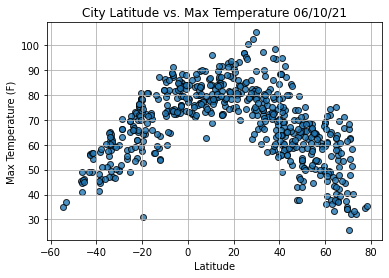

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

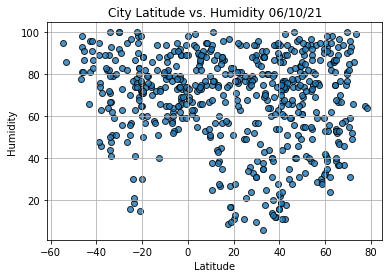

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

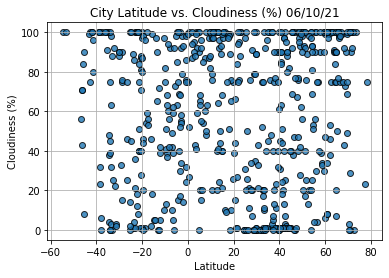

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

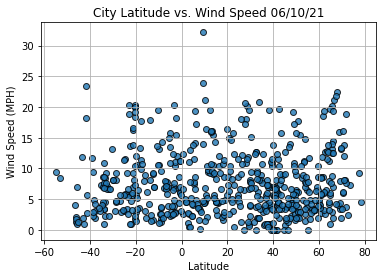

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [21]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [22]:
# Perform linear regression.
linregress(lats,temps)

LinregressResult(slope=-0.452929121241496, intercept=92.93922548147363, rvalue=-0.7590444753769936, pvalue=0.01089687086168761, stderr=0.13734880392044935, intercept_stderr=6.372784691788096)

In [23]:
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [24]:
# Calculate regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

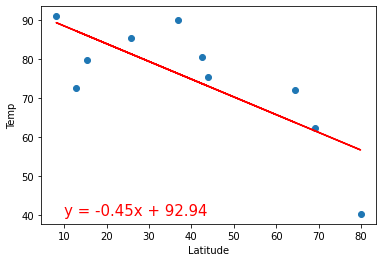

In [25]:
# Import matplotlib
import matplotlib.pyplot as plt

#Create a scatter plot of the x and y axis
plt.scatter(lats, temps)

#Plot the regression line with the x-values and the y coordinates based on the intercept and slope
plt.plot(lats, regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color='red')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [26]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats, temps)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

TypeError: can't multiply sequence by non-int of type 'numpy.float64'